<h1 style="color: darkblue; text-align: center;">Activity 3: dengue Data Analysis Overview</h1>
<h2 style="color: darkred; text-align: center;">Analyst: Arnel N. Caparros</h2>
<hr style="border: 2px solid darkblue; width: 60%;">

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dengue = pd.read_csv('dengue.csv')

In [4]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

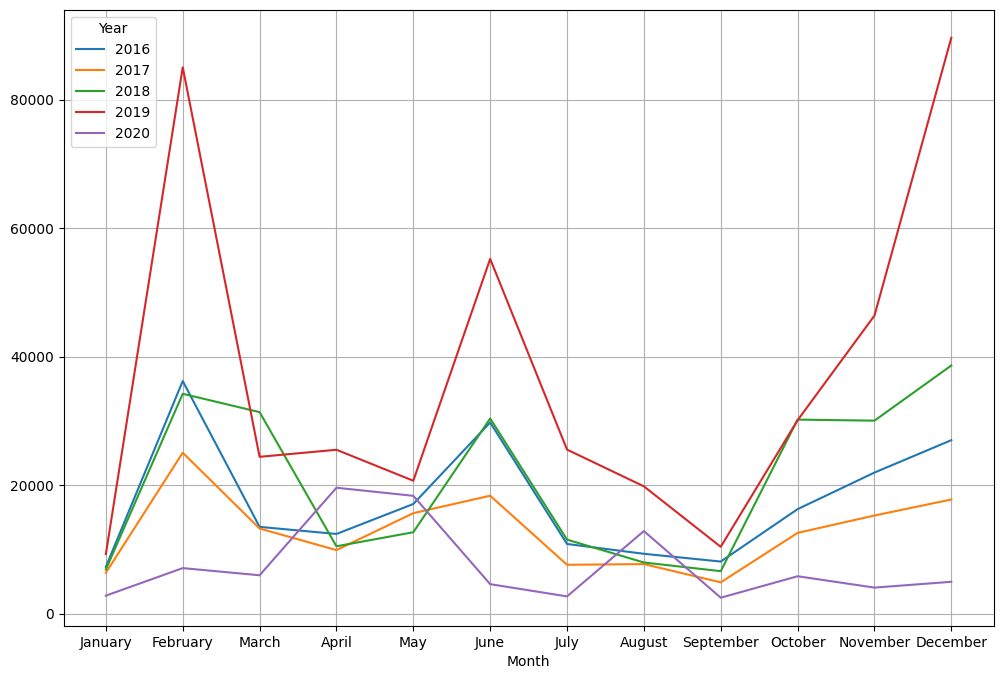

In [7]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December',]
# dengue['Month'] = pd.Categorical(dengue['Month'],categories=month_order, order=True

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

    
monthly_cases.unstack().plot()
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12),month_order)
plt.show()

<h1>DENGUE CASES TREND FROM 2016 - 2010</h1>

<H1>LINE PLOT WITH SEABORN</H1>

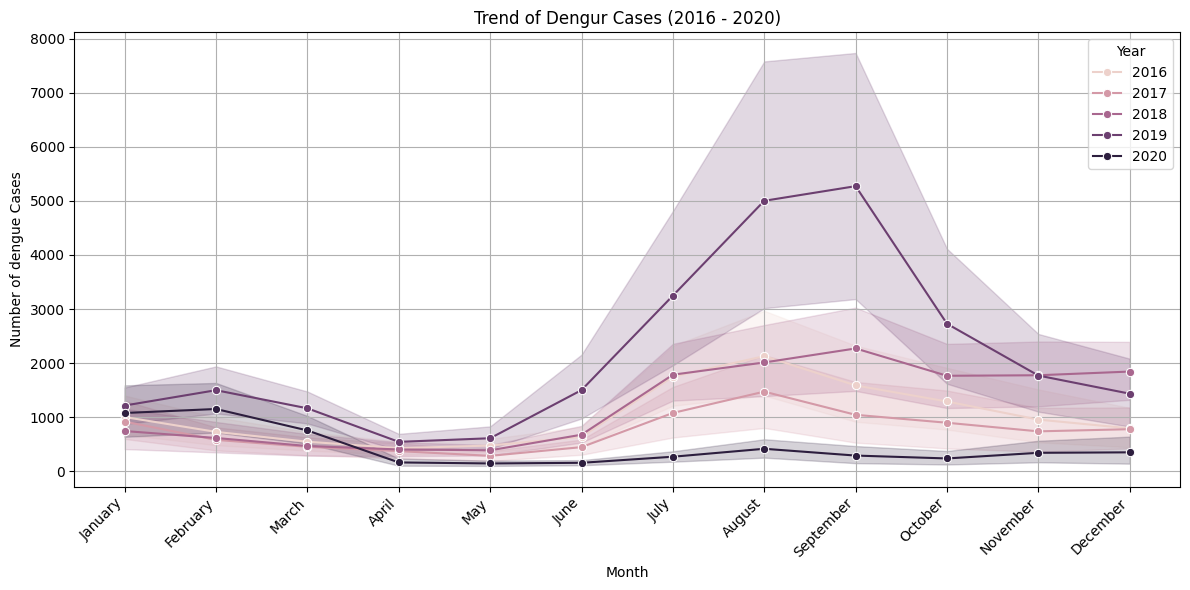

In [16]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December',]
# dengue['Month'] = pd.Categorical(dengue['Month'],categories=month_order, order=True

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengur Cases (2016 - 2020)')
plt.xlabel('Month')
plt.ylabel('Number of dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>ANALYSIS OF DENGUE CASES PER REGION</h1>

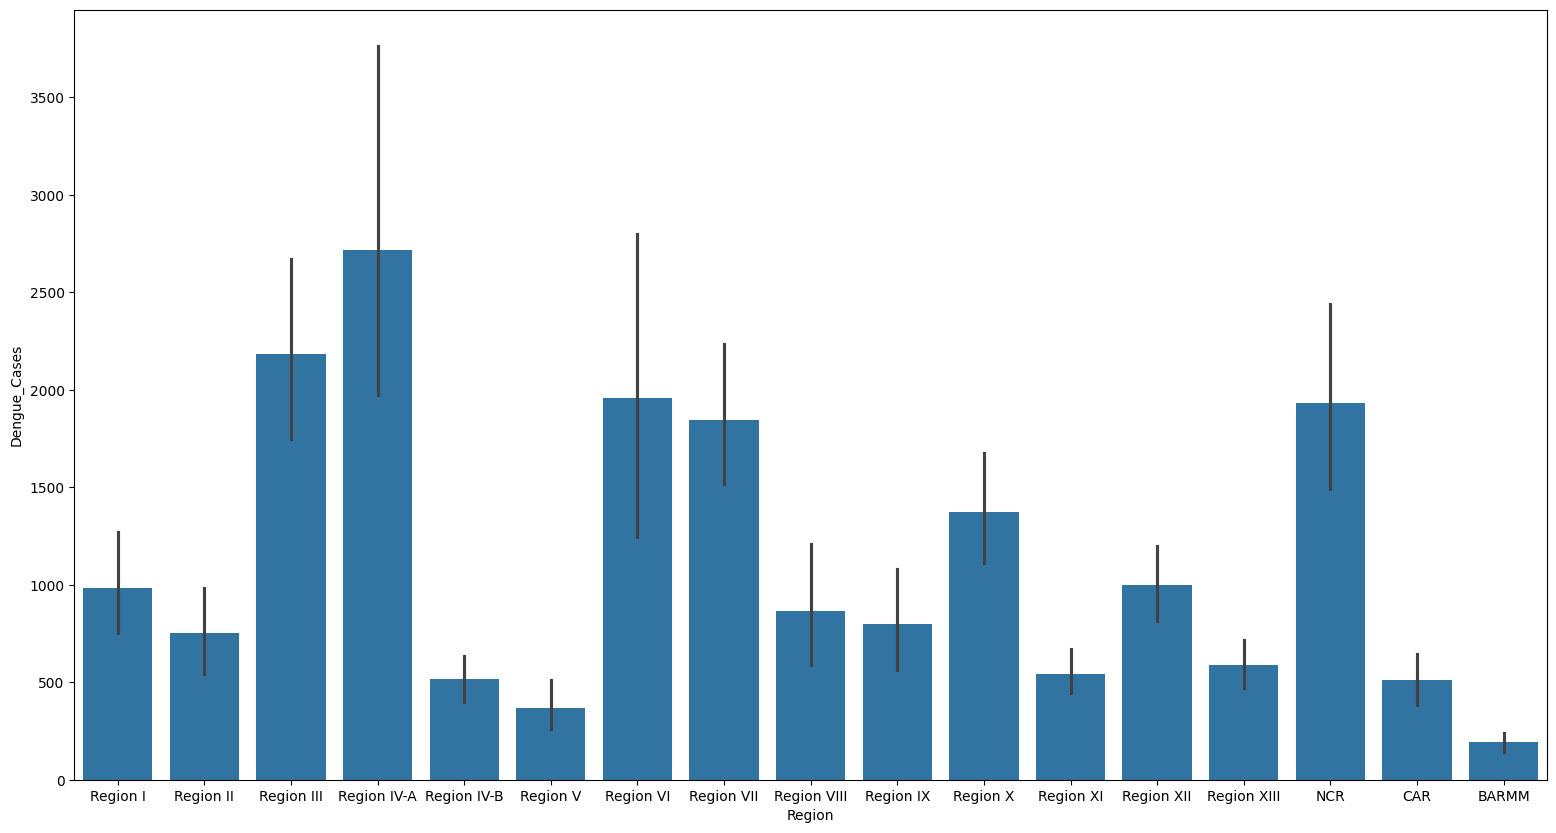

In [18]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h1>Mortality Rate per each Region</h1>

In [22]:
Regional_death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

Regional_death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [30]:
Regional_death["Mortality_Rate"] = np.round((Regional_death["Dengue_Deaths"] / Regional_death["Dengue_Cases"]) * 100,2)

In [32]:
Regional_death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


<h1>Mortality per Region thru Heat Map</h1>

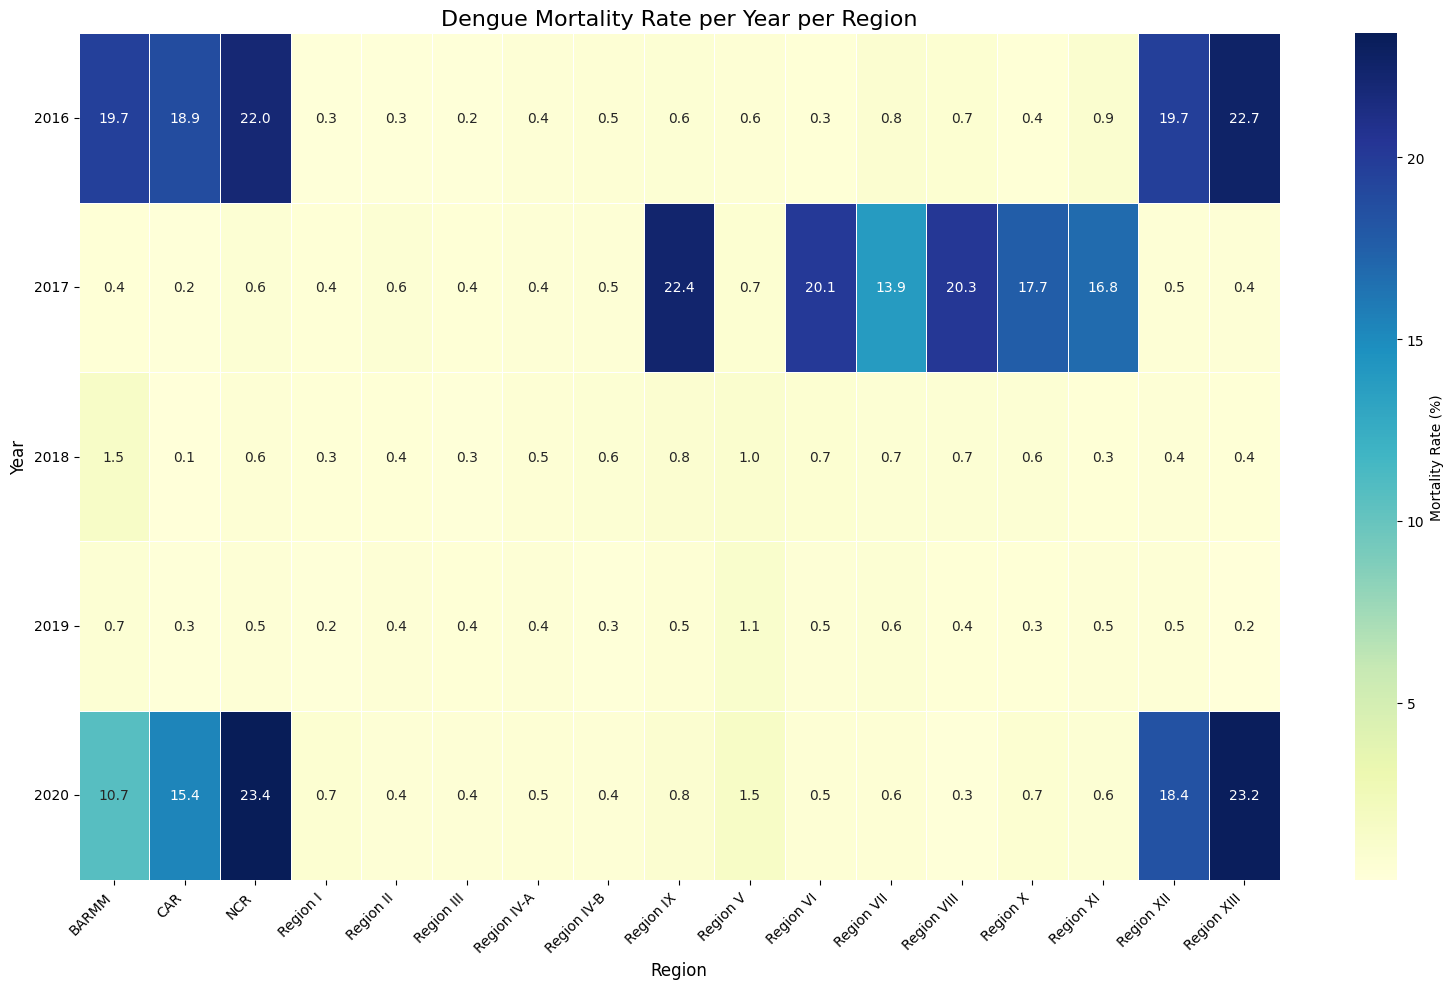

In [42]:
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) *100

heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()


plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h1>Exploratory Data Analysis (EDA)</h1>

<h1>1. What are the total dengue cases and deaths across all years?</h1>

In [52]:
total_cases = dengue['Dengue_Cases'].sum()
total_deaths = dengue['Dengue_Deaths'].sum()
print(f"Total Cases: {total_cases:,} | Total Deaths: {total_deaths:,}")

Total Cases: 1,147,425 | Total Deaths: 16,844


<h1>2. How have dengue cases changed yearly?</h1>

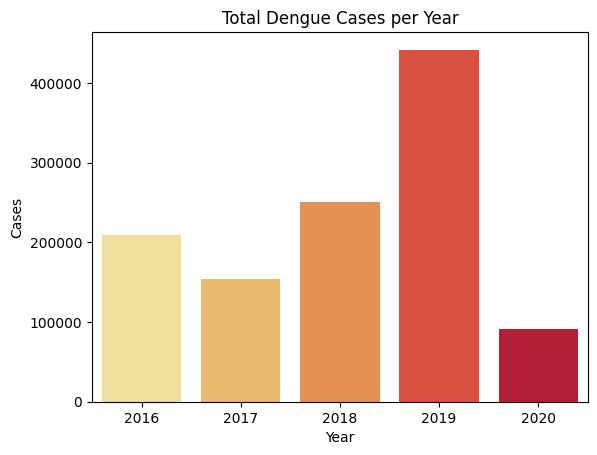

In [55]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()
sns.barplot(data=yearly_cases, x='Year', y='Dengue_Cases', palette='YlOrRd')
plt.title('Total Dengue Cases per Year')
plt.ylabel('Cases')
plt.show()

<h1>3. Which region had the most cases overall?</h1>

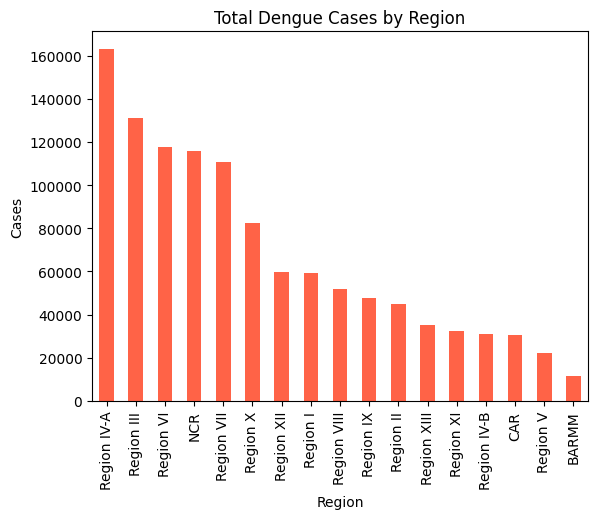

In [56]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
region_cases.plot(kind='bar', color='tomato')
plt.title('Total Dengue Cases by Region')
plt.ylabel('Cases')
plt.show()

<h1>4. Which region had the most deaths overall?</h1>

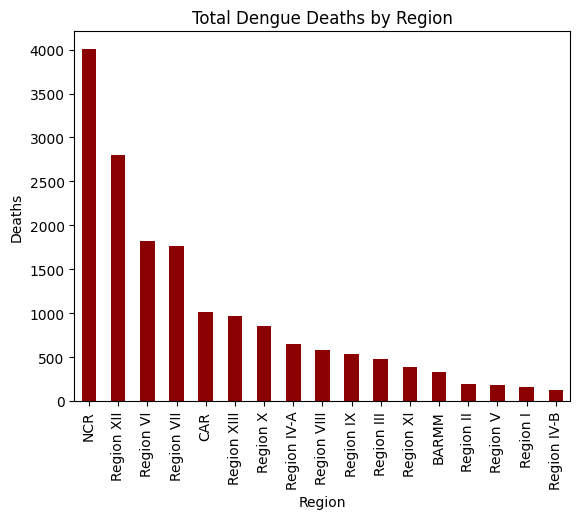

In [57]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
region_deaths.plot(kind='bar', color='darkred')
plt.title('Total Dengue Deaths by Region')
plt.ylabel('Deaths')
plt.show()


<h1>5. Which year had the highest number of dengue cases per region?</h1>

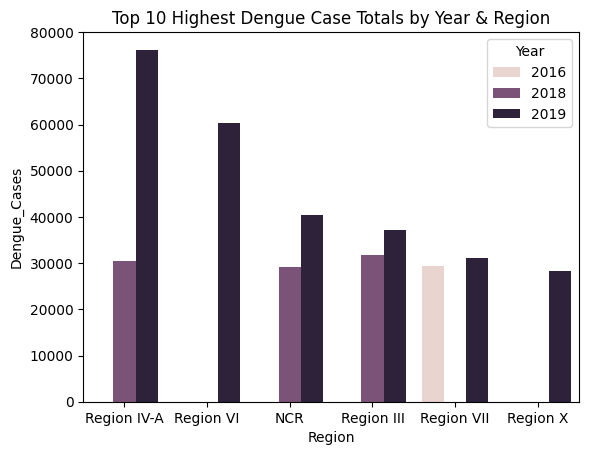

In [58]:
top_year_region = dengue.groupby(['Year','Region'])['Dengue_Cases'].sum().reset_index()
top = top_year_region.sort_values('Dengue_Cases', ascending=False).head(10)
sns.barplot(data=top, x='Region', y='Dengue_Cases', hue='Year')
plt.title('Top 10 Highest Dengue Case Totals by Year & Region')
plt.show()


<h1>6. Correlation between cases and deaths
</h1>

In [60]:
corr = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr()
corr

,Dengue_Cases,Dengue_Deaths
Dengue_Cases,1.000000,0.038322
Dengue_Deaths,0.038322,1.000000


<h1>7. Trend of cases in a specific region </h1>

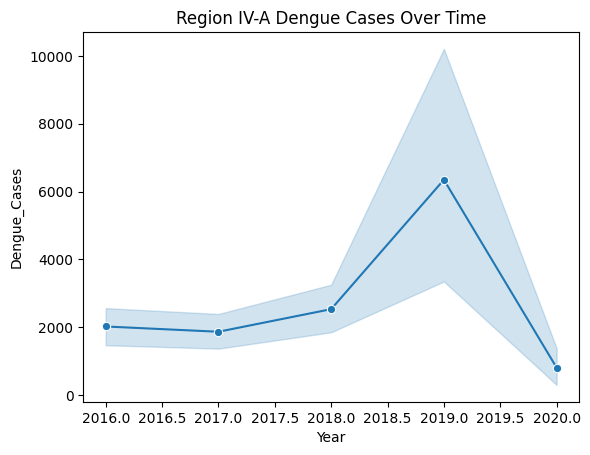

In [61]:
region_name = "Region IV-A"
region_trend = dengue[dengue['Region'] == region_name]
sns.lineplot(data=region_trend, x='Year', y='Dengue_Cases', marker='o')
plt.title(f'{region_name} Dengue Cases Over Time')
plt.show()

<h1>8. What’s the relationship between Dengue Cases and Deaths (scatter)?</h1>

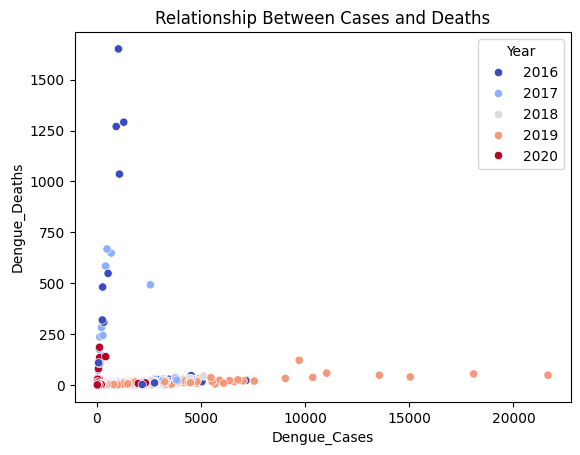

In [62]:
sns.scatterplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Year', palette='coolwarm')
plt.title('Relationship Between Cases and Deaths')
plt.show()

<h1>9. Highest mortality rates by region and year</h1>

In [63]:
top_mortality = dengue.sort_values('Mortality_Rate', ascending=False).head(10)
print("Top 10 highest mortality rates:")
print(top_mortality[['Year','Region','Month','Mortality_Rate']])

Top 10 highest mortality rates:
     Year       Region    Month  Mortality_Rate
789  2016  Region XIII  October      173.646209
501  2017  Region VIII  October      163.888889
561  2017    Region IX  October      162.962963
849  2016          NCR  October      159.825750
897  2020          NCR  October      143.410853
837  2020  Region XIII  October      140.000000
441  2017   Region VII  October      138.717340
381  2017    Region VI  October      136.885246
729  2016   Region XII  October      136.853448
969  2016        BARMM  October      132.926829


<h1>10. Which month tends to have the highest deaths?</h1>

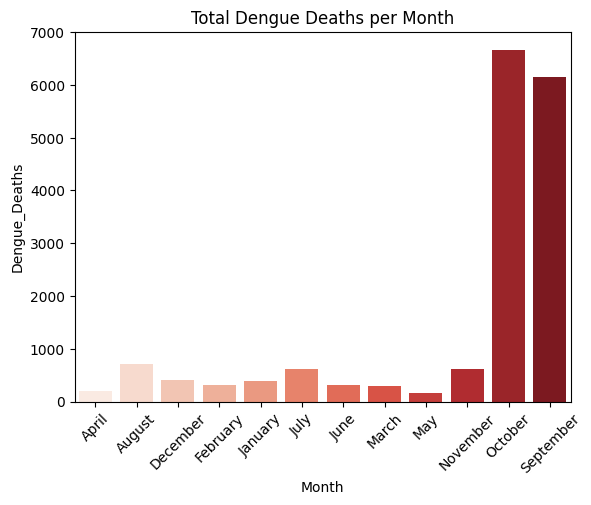

In [64]:
month_deaths = dengue.groupby('Month')['Dengue_Deaths'].sum().reset_index()
sns.barplot(data=month_deaths, x='Month', y='Dengue_Deaths', palette='Reds')
plt.title('Total Dengue Deaths per Month')
plt.xticks(rotation=45)
plt.show()